# <font color='blue'>Data Science Academy - Machine Learning</font>

# <font color='blue'>Capítulo 5 - Classificação KNN</font>

O KNN é um dos algoritmos mais simples para Machine Learning, sendo um algoritmo do tipo "lazy", ou seja, nenhuma computação é realizada no dataset até que um novo ponto de dado seja alvo de teste.

Veremos agora não apenas o KNN, mas também a influência das dimensões em processos de classificação. Utilizaremos o dataset de dígitos fornecido pelo Scikit-learn.

http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

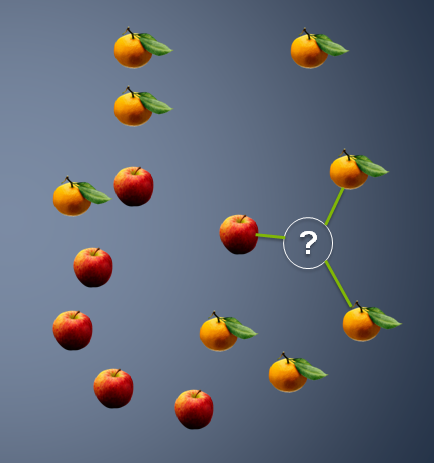

In [1]:
from IPython.display import Image
Image('frutas1.png')

In [2]:
# Carrega os pacotes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.model_selection
import sklearn.decomposition
import sklearn.model_selection
import sklearn.neighbors
import sklearn.metrics

In [3]:
# Gera o dataset
digitos = sklearn.datasets.load_digits()

<Figure size 432x288 with 0 Axes>

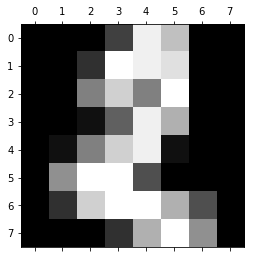

In [4]:
# Plot de um dos itens do dataset
plt.gray() 
plt.matshow(digitos.images[2]) 
plt.show() 

In [5]:
# Gera X e Y
X = digitos.data
Y = digitos.target

In [6]:
# Formato de X e Y
print(X.shape, Y.shape)

(1797, 64) (1797,)


In [7]:
# Cross Validation para gerar os datasets de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = sklearn.model_selection.train_test_split (X, Y, 
                                                                                  test_size = 0.33, 
                                                                                  random_state = 101)

In [8]:
# Normalização dos dados pela Média

# Cálculo da média do dataset de treino
X_norm = np.mean(X_treino, axis = 0)

# Normalização dos dados de treino e de teste
X_treino_norm = X_treino - X_norm
X_teste_norm = X_teste - X_norm

In [9]:
# Shape dos datasets
print(X_treino_norm.shape, X_teste_norm.shape, Y_treino.shape, Y_teste.shape)

(1203, 64) (594, 64) (1203,) (594,)


In [10]:
# Single Value Decompositon (SVD) - Redução de Dimensionalidade
# Redução de Componentes Linear, similar ao PCA
svd = sklearn.decomposition.TruncatedSVD(n_components = 2)
X_2d = svd.fit_transform(X_treino_norm)

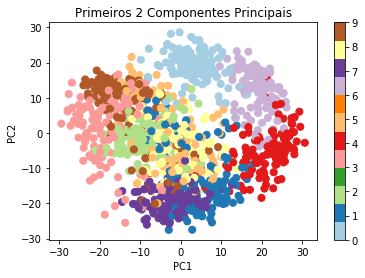

In [11]:
# Plot dos 2 primeiros Componentes Principais
plt.scatter(X_2d[:,0], X_2d[:,1], c = Y_treino, s = 50, cmap = plt.cm.Paired)
plt.colorbar()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Primeiros 2 Componentes Principais')
plt.show()

In [12]:
# Função para testar o melhor valor de K
def compute_teste (x_teste, y_teste, clf, cv):
    KFolds = sklearn.model_selection.KFold(n_splits = cv)
    
    scores = []
    
    for i, j in KFolds.split(x_teste):
        test_set = x_teste[j]
        test_labels = y_teste[j]
        scores.append(sklearn.metrics.accuracy_score(test_labels, clf.predict(test_set)))
    return scores

In [13]:
# Definição de parâmetros
k = np.arange(20) + 1
parametros = {'n_neighbors':k}

In [14]:
# Construção do Modelo KNN
# http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
modelo = sklearn.neighbors.KNeighborsClassifier()

In [15]:
modelo.get_params

<bound method BaseEstimator.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')>

In [16]:
# Grid Search para Cross Validation com o melhor valor de K
modeloKNN = sklearn.model_selection.GridSearchCV(modelo, parametros, cv = 10)

In [17]:
modeloKNN.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)>

In [18]:
# Listas vazias que vão receber os scrores de acurária e os parâmetros resultados do modelo
acuracia = []
params = []

In [19]:
# Lista de dimensões
dimensoes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [20]:
# Implementação do modelo
for d in dimensoes:
    svd = sklearn.decomposition.TruncatedSVD(n_components = d)
    
    if d < 64:
        X_fit_treino = svd.fit_transform(X_treino)
        X_fit_teste = svd.transform(X_teste)
    else:
        X_nl = X_treino
        X_nl1 = X_teste
        
    modeloKNN.fit(X_fit_treino, Y_treino)
    
    acuracia.append(compute_teste(x_teste = X_fit_teste, y_teste = Y_teste, clf = modeloKNN, cv = 10))
    params.append(modeloKNN.best_params_['n_neighbors'])

In [21]:
# A acurácia aumenta à medida que usamos mais dimensões para o modelo de classificação
acuracia

[[0.18333333333333332,
  0.08333333333333333,
  0.16666666666666666,
  0.13333333333333333,
  0.1864406779661017,
  0.1016949152542373,
  0.13559322033898305,
  0.1016949152542373,
  0.06779661016949153,
  0.15254237288135594],
 [0.48333333333333334,
  0.4,
  0.4166666666666667,
  0.31666666666666665,
  0.3898305084745763,
  0.4067796610169492,
  0.4576271186440678,
  0.5423728813559322,
  0.3050847457627119,
  0.3898305084745763],
 [0.6833333333333333,
  0.6666666666666666,
  0.6333333333333333,
  0.6666666666666666,
  0.6101694915254238,
  0.576271186440678,
  0.7457627118644068,
  0.6779661016949152,
  0.6101694915254238,
  0.6440677966101694],
 [0.8166666666666667,
  0.8166666666666667,
  0.75,
  0.7666666666666667,
  0.7627118644067796,
  0.7288135593220338,
  0.864406779661017,
  0.847457627118644,
  0.6949152542372882,
  0.8135593220338984],
 [0.9166666666666666,
  0.85,
  0.8333333333333334,
  0.85,
  0.8305084745762712,
  0.8135593220338984,
  0.9152542372881356,
  0.864406779

## Alterando Parâmetros do Modelo

In [22]:
# Alterando parâmetros do modelo
modelo_v2 = sklearn.neighbors.KNeighborsClassifier(metric = 'hamming')
modeloKNN_v2 = sklearn.model_selection.GridSearchCV(modeloKNN, parametros, cv = 10)

In [23]:
modelo_v2.get_params

<bound method BaseEstimator.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='hamming',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')>

In [24]:
# Listas vazias que vão receber os scrores de acurária e os parâmetros resultados do modelo
acuracia = []
params = []

# Lista de dimensões
dimensoes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [25]:
# Implementação do modelo
for d in dimensoes:
    svd = sklearn.decomposition.TruncatedSVD(n_components = d)
    
    if d < 64:
        X_fit_treino = svd.fit_transform(X_treino)
        X_fit_teste = svd.transform(X_teste)
    else:
        X_nl = X_treino
        X_nl1 = X_teste
        
    modelo_v2.fit(X_fit_treino, Y_treino)
    
    acuracia.append(compute_teste(x_teste = X_fit_teste, y_teste = Y_teste, clf = modelo_v2, cv = 10))

In [26]:
acuracia

[[0.18333333333333332,
  0.08333333333333333,
  0.13333333333333333,
  0.13333333333333333,
  0.05084745762711865,
  0.0847457627118644,
  0.06779661016949153,
  0.1016949152542373,
  0.0847457627118644,
  0.06779661016949153],
 [0.08333333333333333,
  0.05,
  0.13333333333333333,
  0.13333333333333333,
  0.1016949152542373,
  0.05084745762711865,
  0.06779661016949153,
  0.1016949152542373,
  0.06779661016949153,
  0.1016949152542373],
 [0.18333333333333332,
  0.08333333333333333,
  0.13333333333333333,
  0.13333333333333333,
  0.05084745762711865,
  0.0847457627118644,
  0.06779661016949153,
  0.1016949152542373,
  0.0847457627118644,
  0.06779661016949153],
 [0.18333333333333332,
  0.08333333333333333,
  0.13333333333333333,
  0.13333333333333333,
  0.05084745762711865,
  0.0847457627118644,
  0.06779661016949153,
  0.1016949152542373,
  0.0847457627118644,
  0.06779661016949153],
 [0.08333333333333333,
  0.05,
  0.11666666666666667,
  0.08333333333333333,
  0.0847457627118644,
  0.

# Fim

### Obrigado - Data Science Academy - <a href="http://facebook.com/dsacademybr">facebook.com/dsacademybr</a>